# Beginning with sample data
- This data comes from the Netherlands. Right now, it's just some sample data to mess around with for now so that I can follow along with a tutorial.
- http://opendap1.nodc.no/thredds/fileServer/chemistry/Chlorophyll/UNIS/AeN_SeaWaterChlorophyllA_20191210_P2.nc

### Installing the complete xarray package

In [3]:
pip install xarray[complete]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import xarray as xr

data = xr.open_dataset('AeN_SeaWaterChlorophyllA_20191210_P2.nc')

*Importing necessary libraries and the data*

In [5]:
print(data)

<xarray.Dataset> Size: 53kB
Dimensions:          (DEPTH: 168, NCHAR: 36)
Coordinates:
  * DEPTH            (DEPTH) float64 1kB 10.0 11.0 12.0 ... 175.0 176.0 177.0
  * NCHAR            (NCHAR) float64 288B 0.0 1.0 2.0 3.0 ... 33.0 34.0 35.0
Data variables:
    CHLOROPHYLL_A    (DEPTH) float64 1kB ...
    FILTERED_VOLUME  (DEPTH) float32 672B ...
    PHAEOPIGMENT     (DEPTH) float64 1kB ...
    EVENT_ID         (DEPTH, NCHAR) object 48kB ...
Attributes: (12/38)
    id:                   37ca1c97-7fe4-58ca-8dac-838c4318979c
    naming_authority:     The University Centre in Svalbard, Norway
    title:                Chl a and phaeopigments AeN2019706
    summary:              \n            This dataset is a collection of the a...
    keywords:             Oceans > Ocean chemistry > Chlorophyll
    keywords_vocabulary:  GCMD Science Keywords
    ...                   ...
    sampleType:           Chlorophyll a tot
    pi_name:              Anna Vader
    pi_institution:       UNIS
    pi_

#### notes: Printing the data "Chunk" itself yields the metadata; Self describing part of the NetCDF file. Very handy!

In [6]:
print(data.attrs)

{'id': '37ca1c97-7fe4-58ca-8dac-838c4318979c', 'naming_authority': 'The University Centre in Svalbard, Norway', 'title': 'Chl a and phaeopigments AeN2019706', 'summary': '\n            This dataset is a collection of the acid-corrected chlorophyll A and phaeopigments measurements taken as part of the Nansen Legacy project \n            (www.arvenetternansen.com). The data is from a single depth profile from station P2 taken on 2019-12-10 at \n            34.0050577166667°E and 77.4996566666667°N. Samples were collected from different depths of the water column.', 'keywords': 'Oceans > Ocean chemistry > Chlorophyll', 'keywords_vocabulary': 'GCMD Science Keywords', 'geospatial_lat_min': 77.4996566666667, 'geospatial_lat_max': 77.4996566666667, 'geospatial_lon_min': 34.0050577166667, 'geospatial_lon_max': 34.0050577166667, 'time_coverage_start': '2019-12-10T16:38:00Z', 'time_coverage_end': '2019-12-10T16:38:00Z', 'Conventions': 'ACDD-1.3, CF-1.8', 'history': "File created at 2021-02-05T08

#### notes: appending .attrs selects only the attributes. Further appending with list/dict notation gets more specific; see below:

In [7]:
print(data.attrs['creator_name'])

Anna Vader, Rita Amundsen


In [8]:
print(data.data_vars)

Data variables:
    CHLOROPHYLL_A    (DEPTH) float64 1kB ...
    FILTERED_VOLUME  (DEPTH) float32 672B ...
    PHAEOPIGMENT     (DEPTH) float64 1kB ...
    EVENT_ID         (DEPTH, NCHAR) object 48kB ...


In [9]:
print(data.data_vars)

Data variables:
    CHLOROPHYLL_A    (DEPTH) float64 1kB ...
    FILTERED_VOLUME  (DEPTH) float32 672B ...
    PHAEOPIGMENT     (DEPTH) float64 1kB ...
    EVENT_ID         (DEPTH, NCHAR) object 48kB ...


In [10]:
print(data['FILTERED_VOLUME'])

<xarray.DataArray 'FILTERED_VOLUME' (DEPTH: 168)> Size: 672B
[168 values with dtype=float32]
Coordinates:
  * DEPTH    (DEPTH) float64 1kB 10.0 11.0 12.0 13.0 ... 174.0 175.0 176.0 177.0
Attributes:
    units:                  l
    long_name:              Volume of sea water filtered for measurement
    coverage_content_type:  physicalMeasurement


## Using basic plotting capability of xarray
see more: https://docs.xarray.dev/en/latest/user-guide/plotting.html

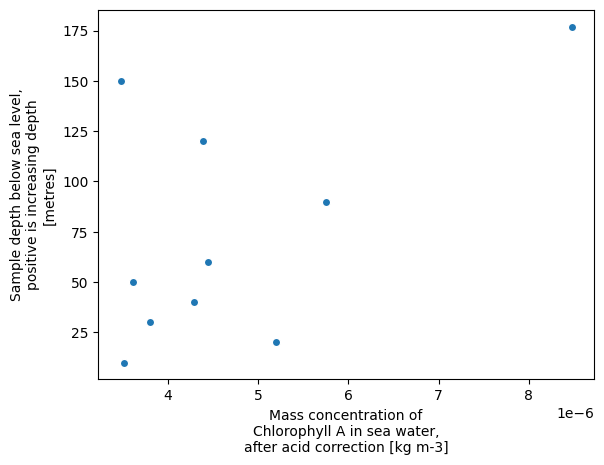

In [11]:
xr.plot.scatter(data, x='CHLOROPHYLL_A', y='DEPTH')

In [12]:
xr.plot.line(data['CHLOROPHYLL_A'].dropna('DEPTH'),y='DEPTH')

#### note: .dropna Returns a new array with dropped labels for missing values along the provided dimension.

## Using xarray to create tables (dataframes)

In [13]:
dataframe = data['CHLOROPHYLL_A'].dropna('DEPTH').to_dataframe()
print(dataframe)

#### note: When graphing more than one data, use double square brackets around them^^

In [16]:
print(dataframe)

       CHLOROPHYLL_A  FILTERED_VOLUME
DEPTH                                
10.0        0.000004              1.0
20.0        0.000005              1.0
30.0        0.000004              1.0
40.0        0.000004              1.0
50.0        0.000004              1.0
60.0        0.000004              1.0
90.0        0.000006              1.0
120.0       0.000004              1.0
150.0       0.000003              1.0
177.0       0.000008              1.0


In [19]:
import os
dataframe.to_csv(os.getcwd() + "/test.csv")

#### note: Export dataframes to CSV or excell using data.to_csv(path) or data.to_excell(path). CSV or xlsx files respectively.

In [21]:
print(data['CHLOROPHYLL_A'].attrs['units'])

kg m-3


Able to check other attributes within data items using the .attrs method

In [24]:
import numpy as np
chla_array = np.array(data['CHLOROPHYLL_A'].dropna('DEPTH'))
print(chla_array)

[3.50973675e-06 5.20004475e-06 3.80319300e-06 4.28446125e-06
 3.61538100e-06 4.44879675e-06 5.75174250e-06 4.39010550e-06
 3.47452200e-06 8.47501650e-06]


Converting the data to a numpy array